# Compare models

This compares several different models trained in turn on the *longliner*,
*trawler* and *purse seiner* data sets.

**NOTE: this was somewhat unstable. Running multiple times yielded significantly different results, 
  depending the data split.  I set seeds everywhere and now the output is stable. However, this tells 
  me that we want more data!**

In [1]:
%matplotlib inline
import vessel_scoring.data
from vessel_scoring.models import train_model_on_data
from vessel_scoring.evaluate_model import evaluate_model, compare_models
from IPython.core.display import display, HTML

In [2]:
from vessel_scoring.legacy_heuristic_model import LegacyHeuristicModel
from vessel_scoring.random_forest_model import RandomForestModel
from vessel_scoring.logistic_model import LogisticModel

untrained_models = [
    ('Logistic', LogisticModel(colspec=dict(windows=[43200]), order=6)),
    ('Logistic (MW)', LogisticModel(colspec=dict(windows=[1800, 3600, 10800, 21600, 43200, 86400]), order=6)),
    ('Logistic (MW/cross)', LogisticModel(colspec=dict(windows=[1800, 3600, 10800, 21600, 43200, 86400]), order=6, cross=2)),
    ('Random Forest', RandomForestModel(colspec=dict(windows=[43200]))),
    ('Random Forest (MW)', RandomForestModel(colspec=dict(windows=[1800, 3600, 10800, 21600, 43200, 86400]))),
    ('Legacy', LegacyHeuristicModel(window=3600)),
    ("Legacy (3 Hour)", LegacyHeuristicModel(window=10800)),
    ("Legacy (12 Hour)", LegacyHeuristicModel(window=43200)),
    ("Legacy (24 Hour)", LegacyHeuristicModel(window=86400)),  
]

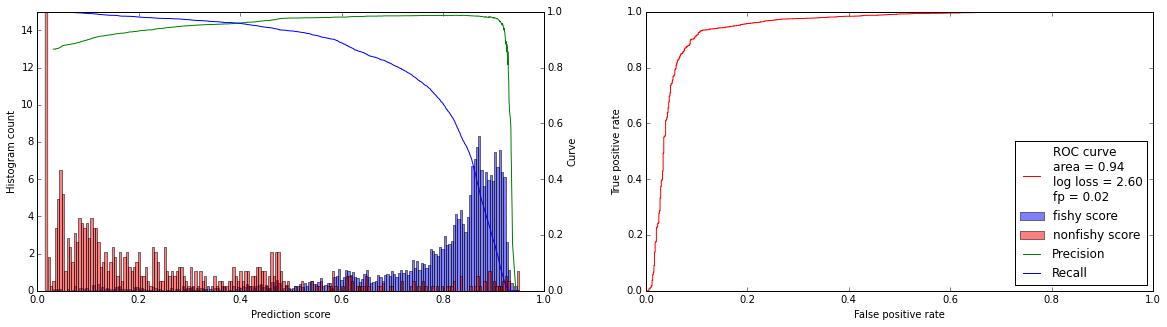

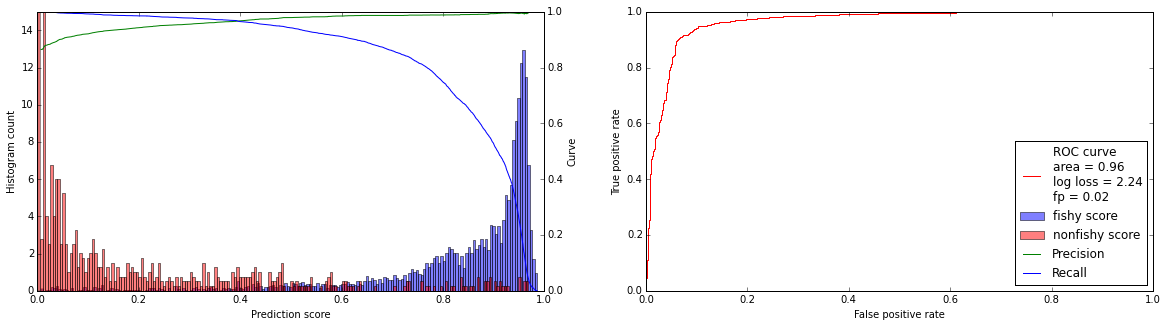

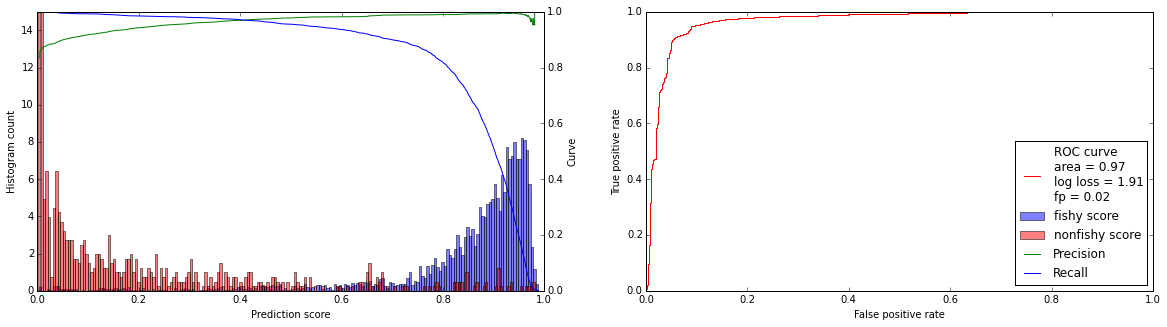

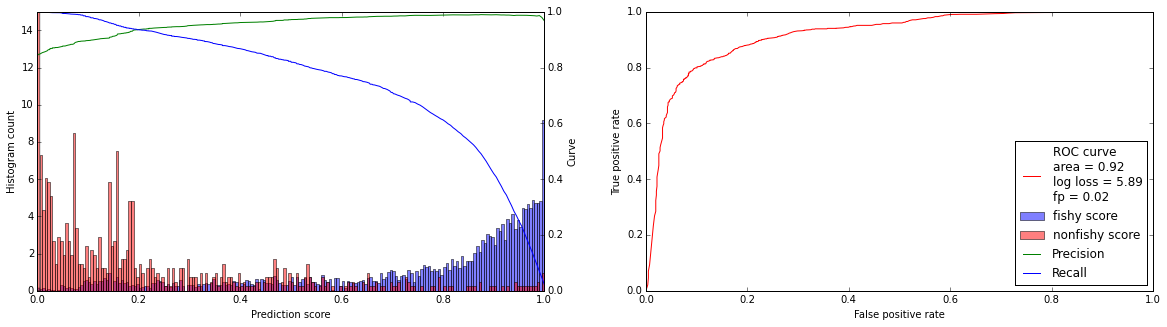

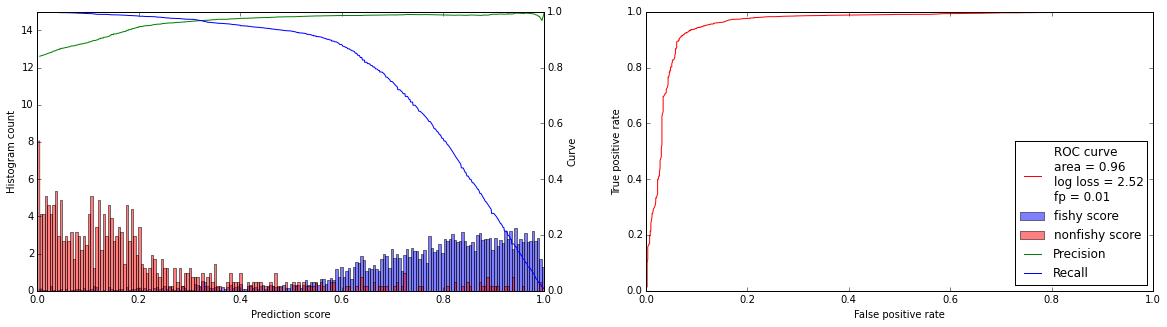

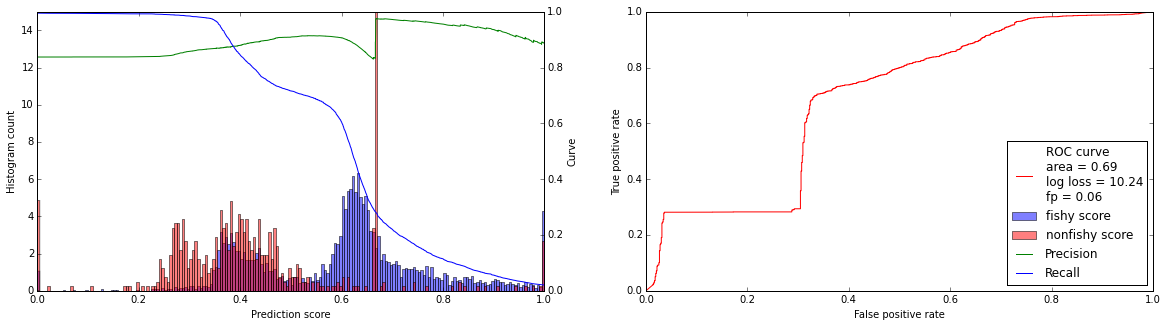

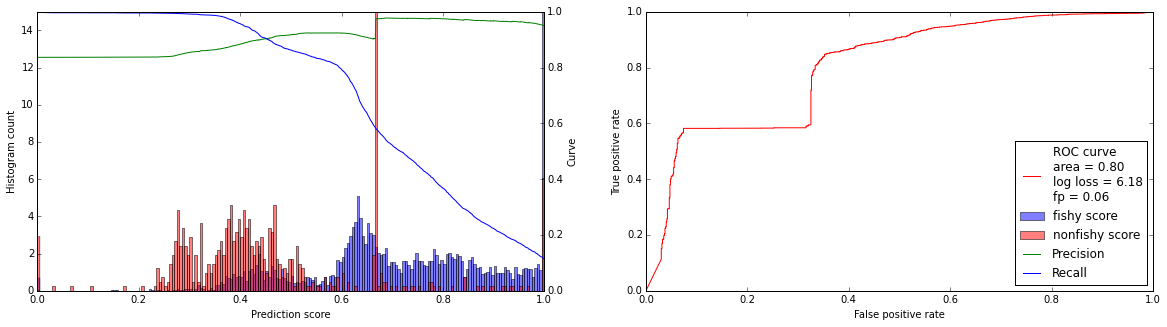

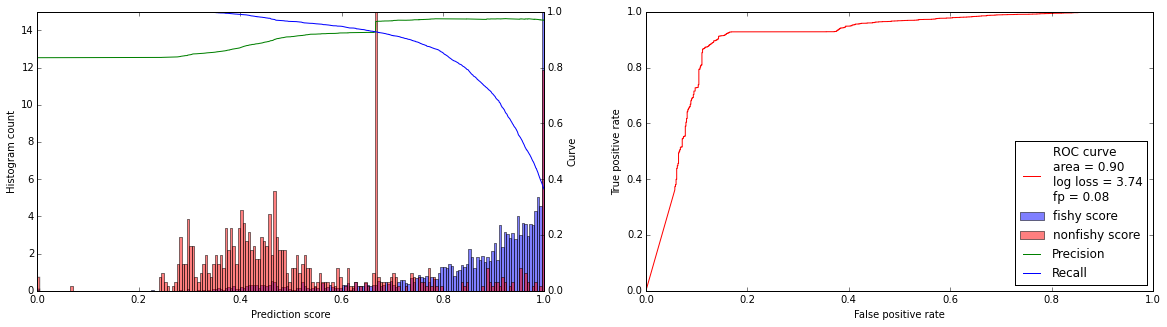

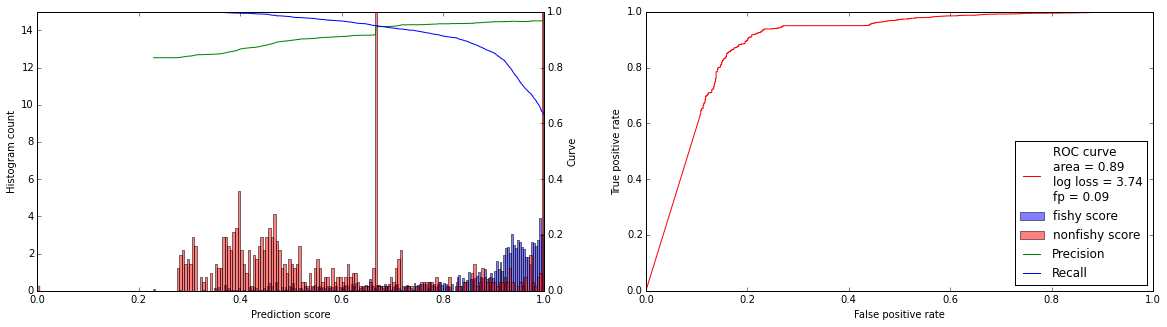

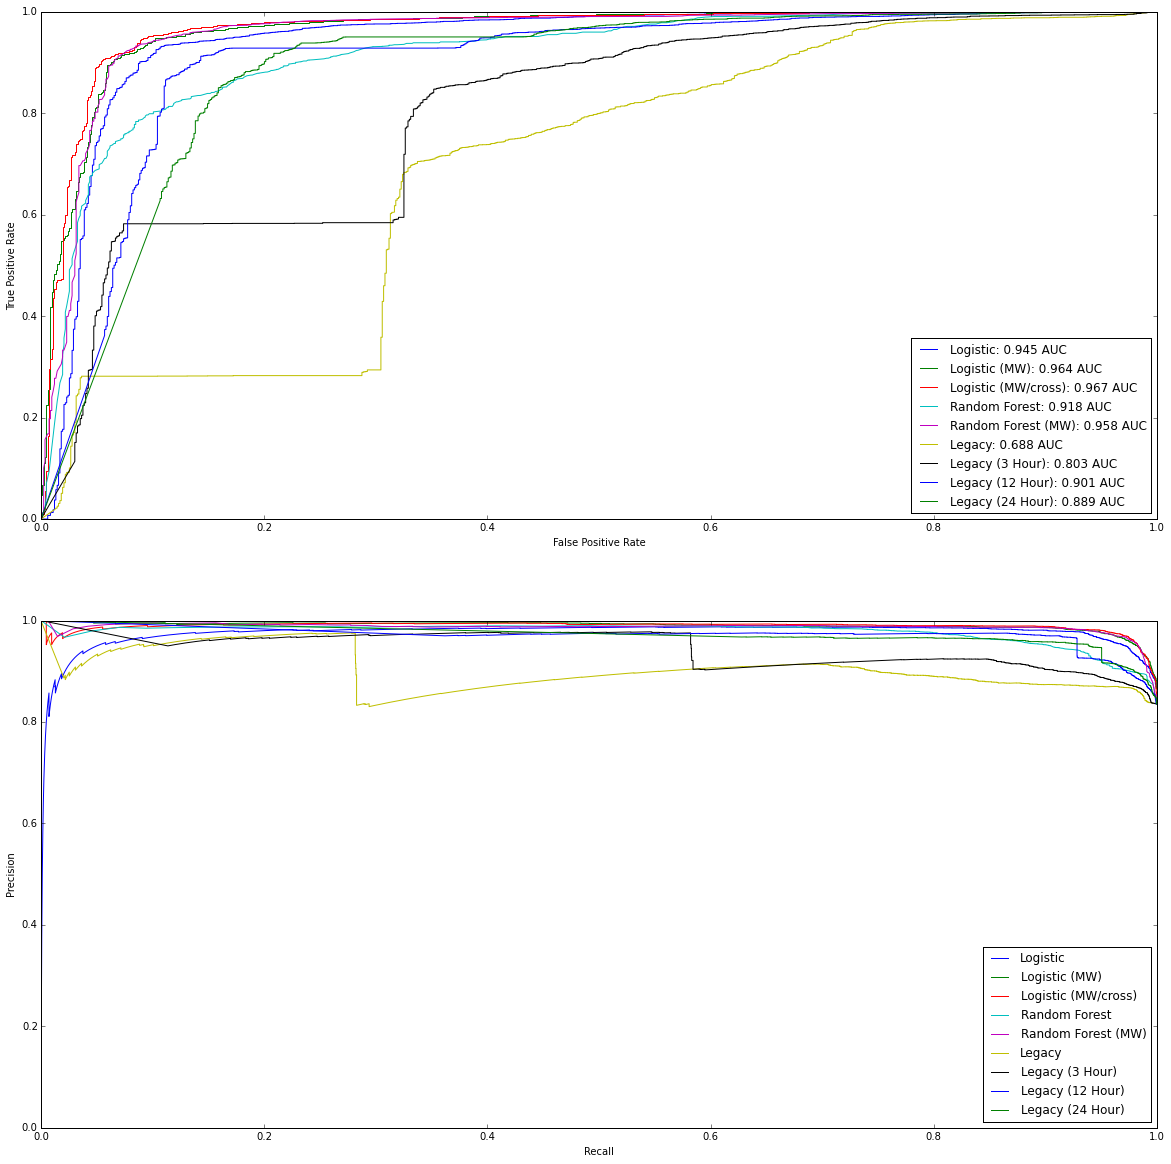

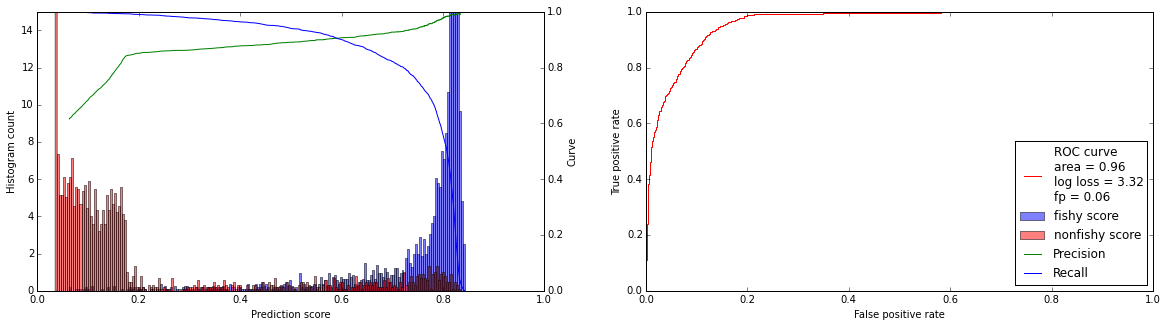

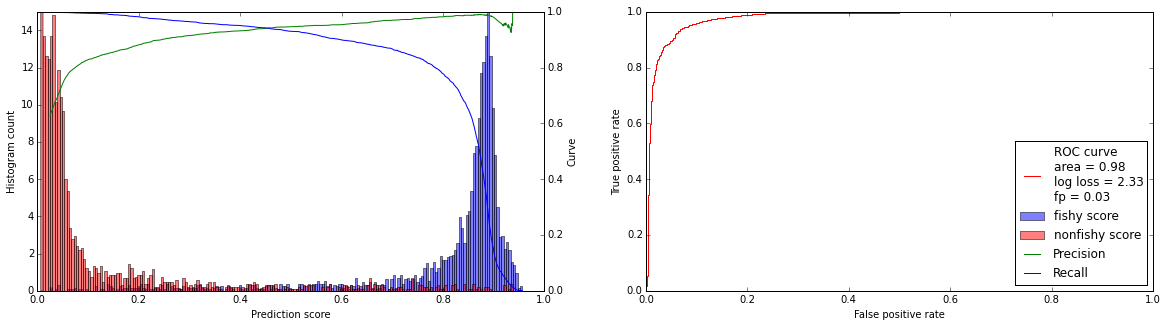

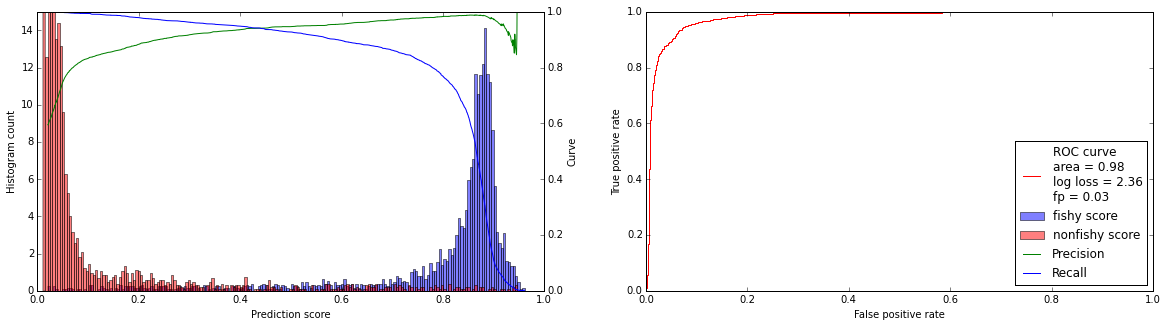

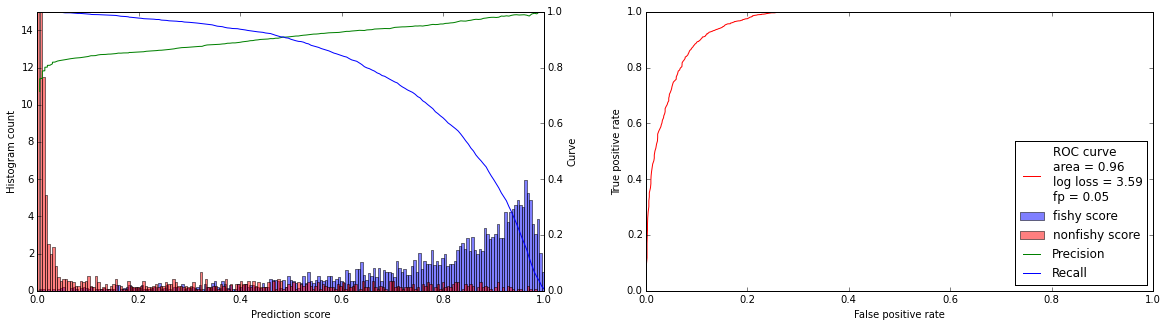

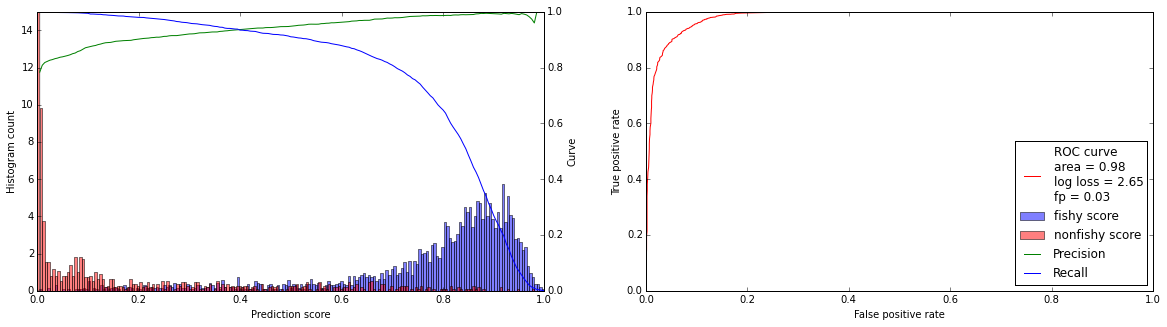

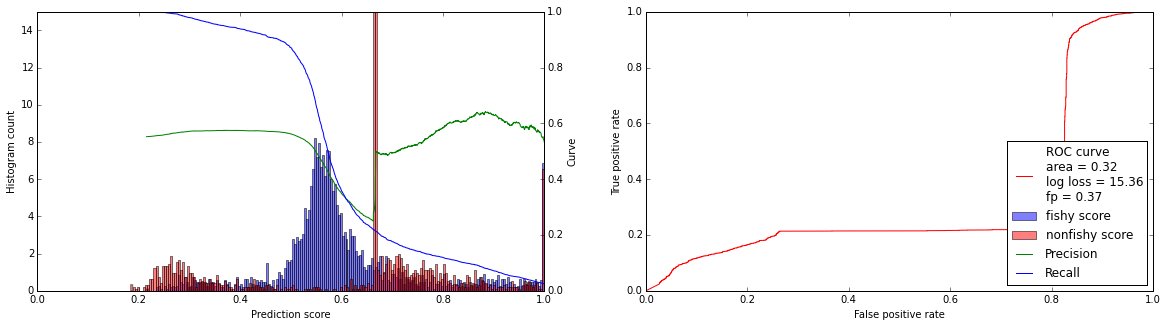

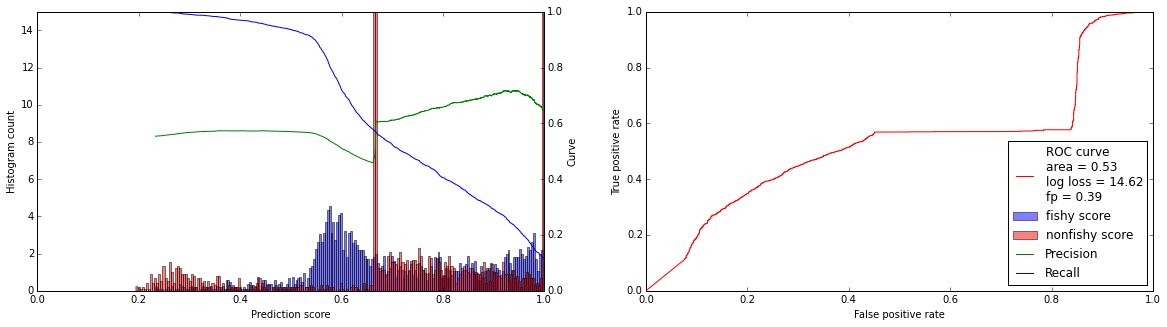

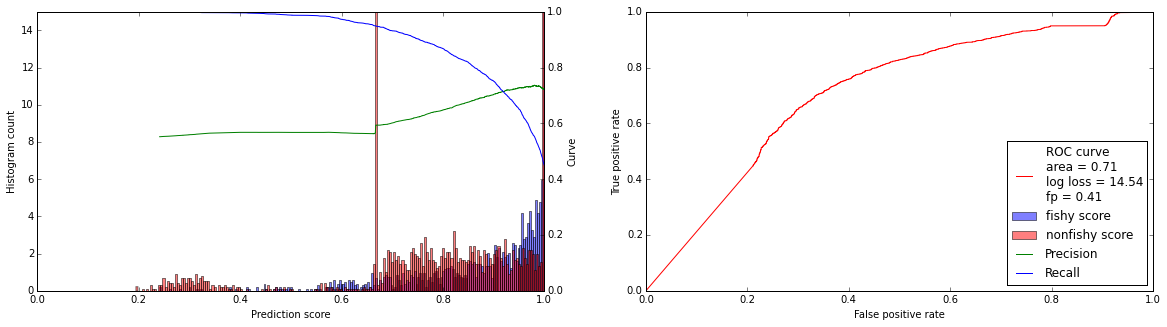

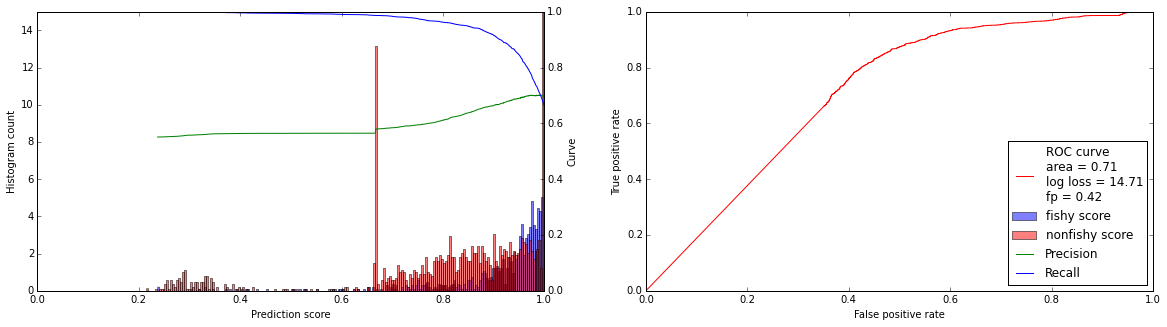

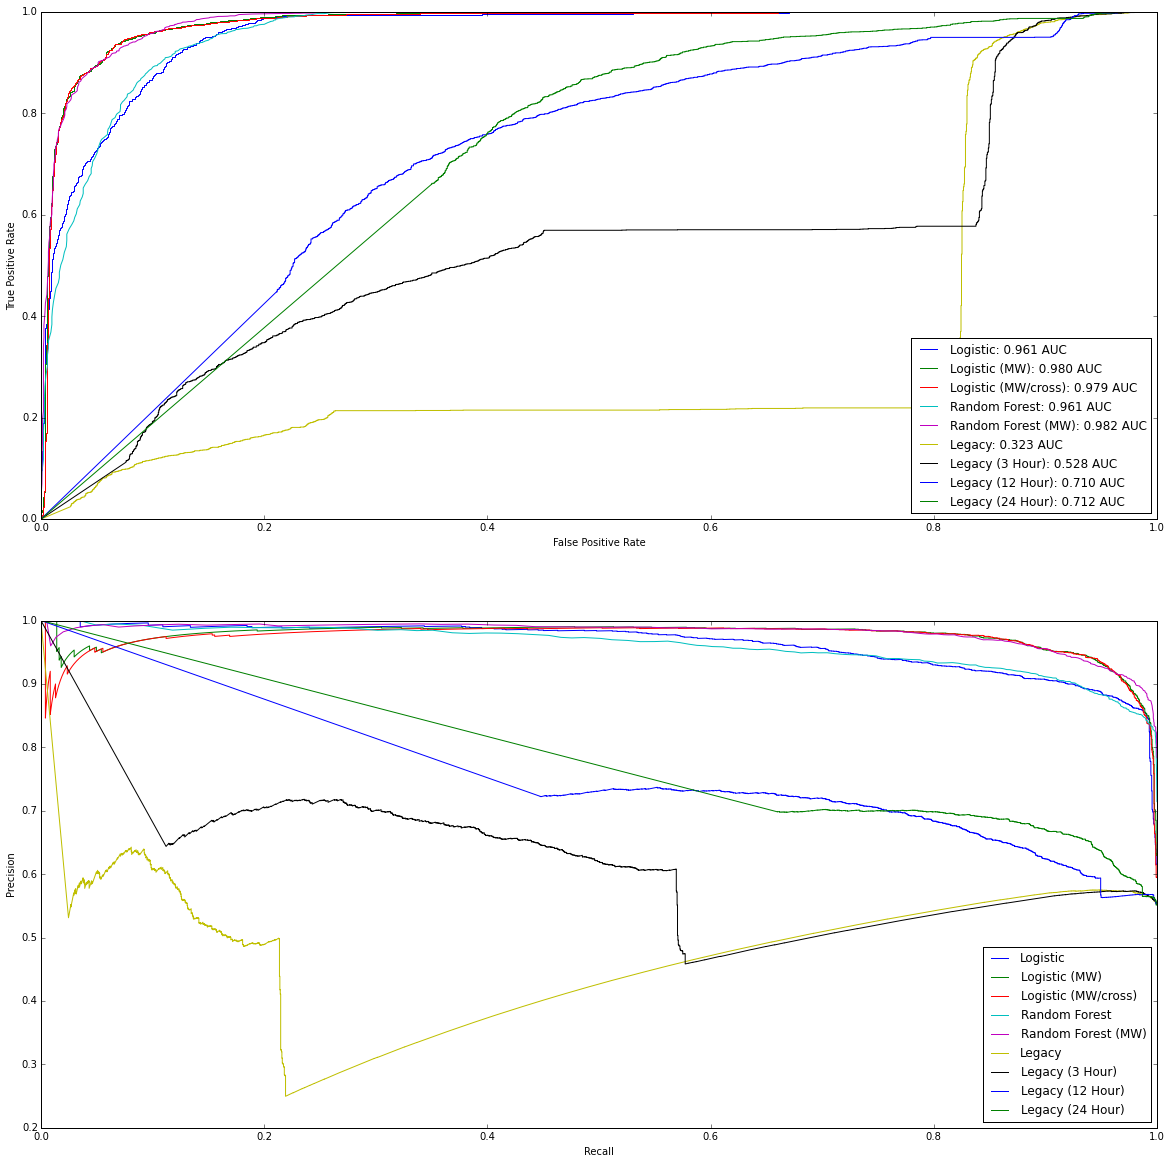

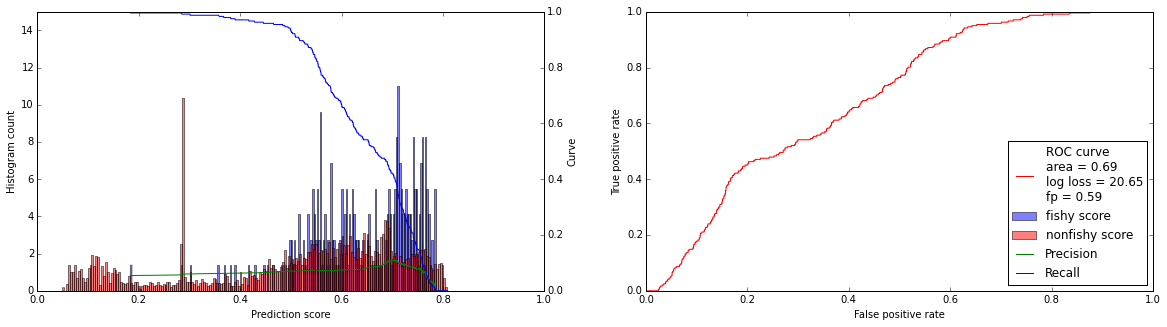

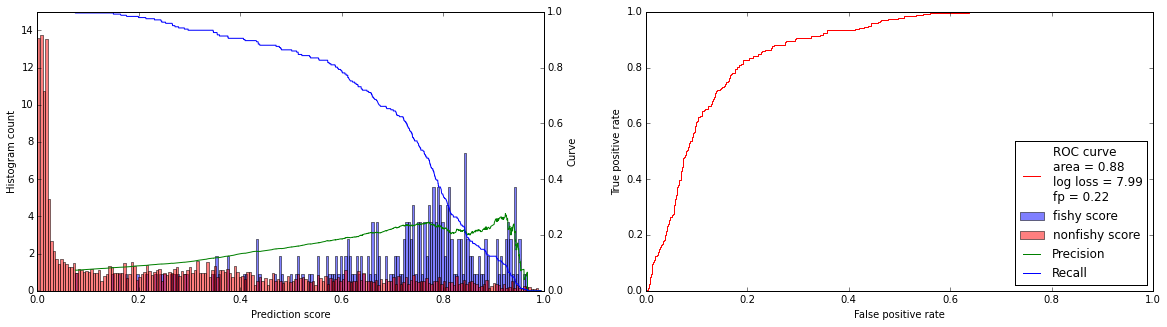

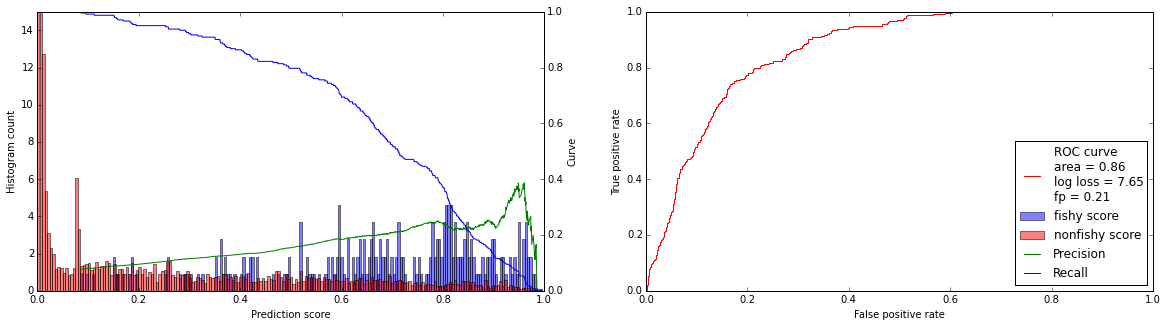

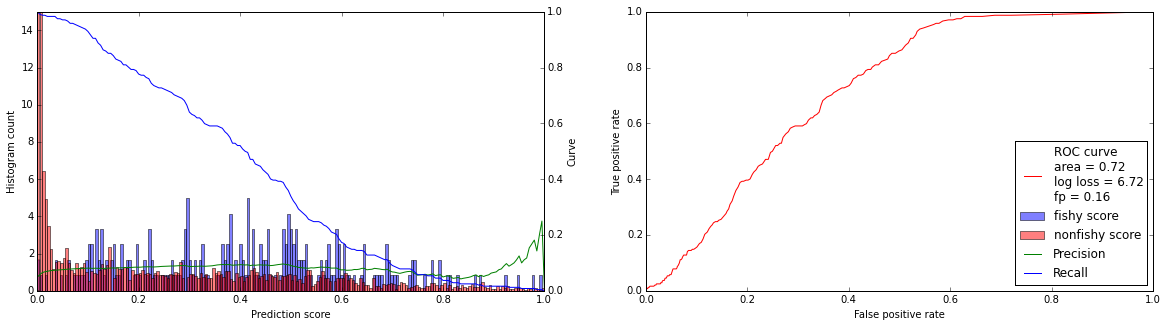

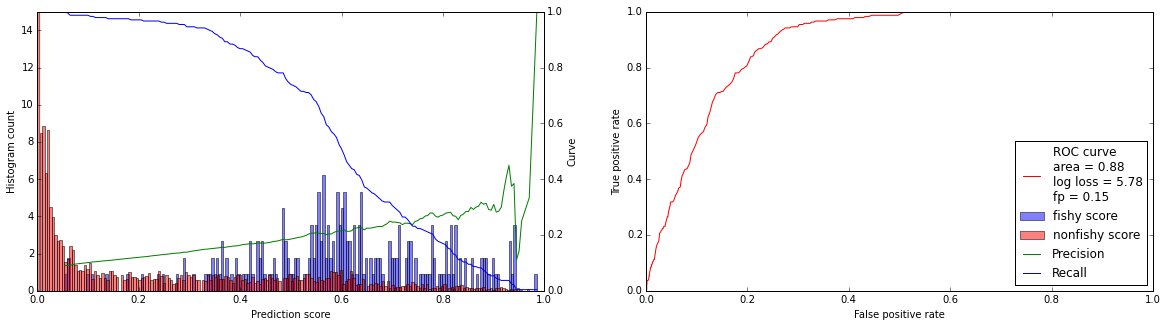

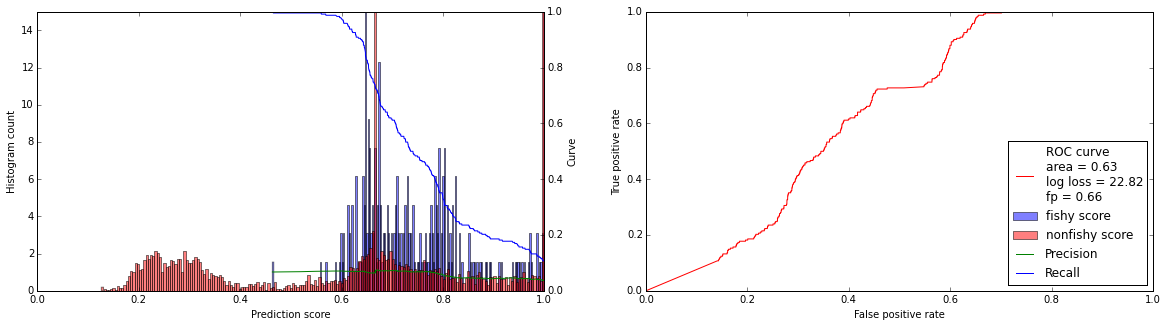

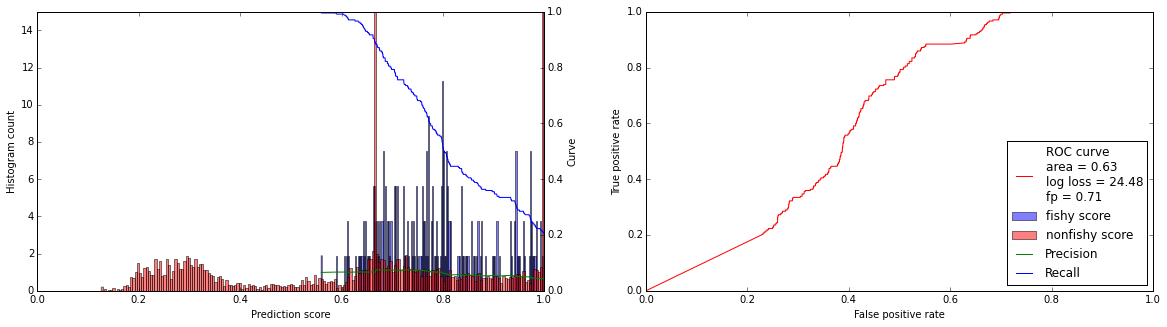

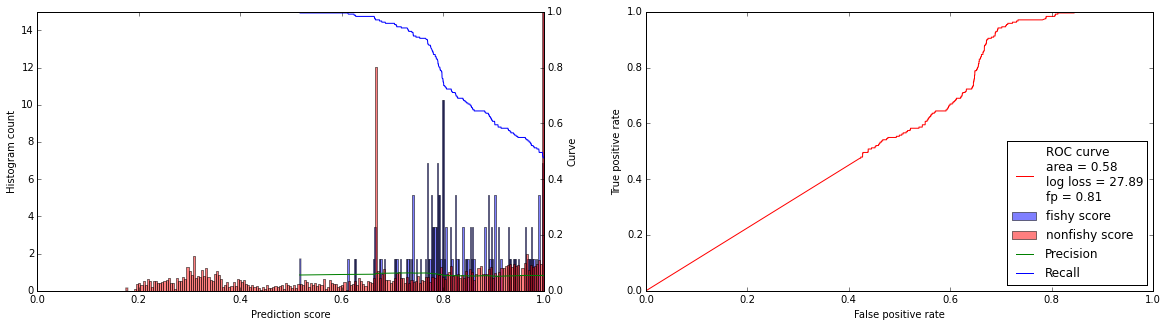

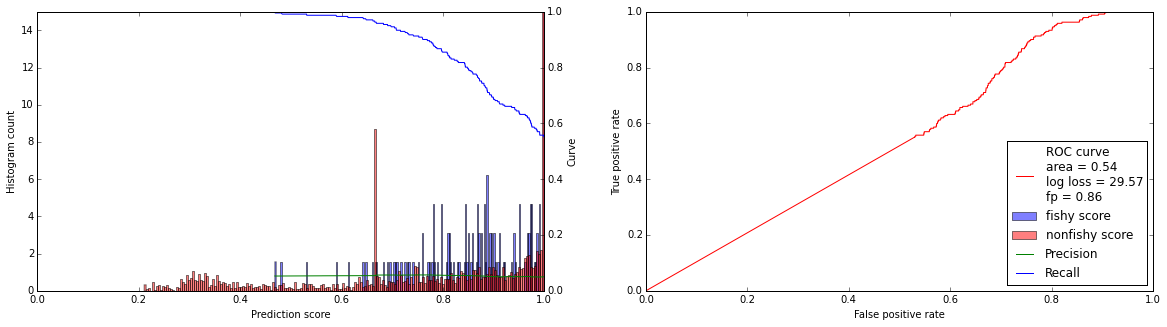

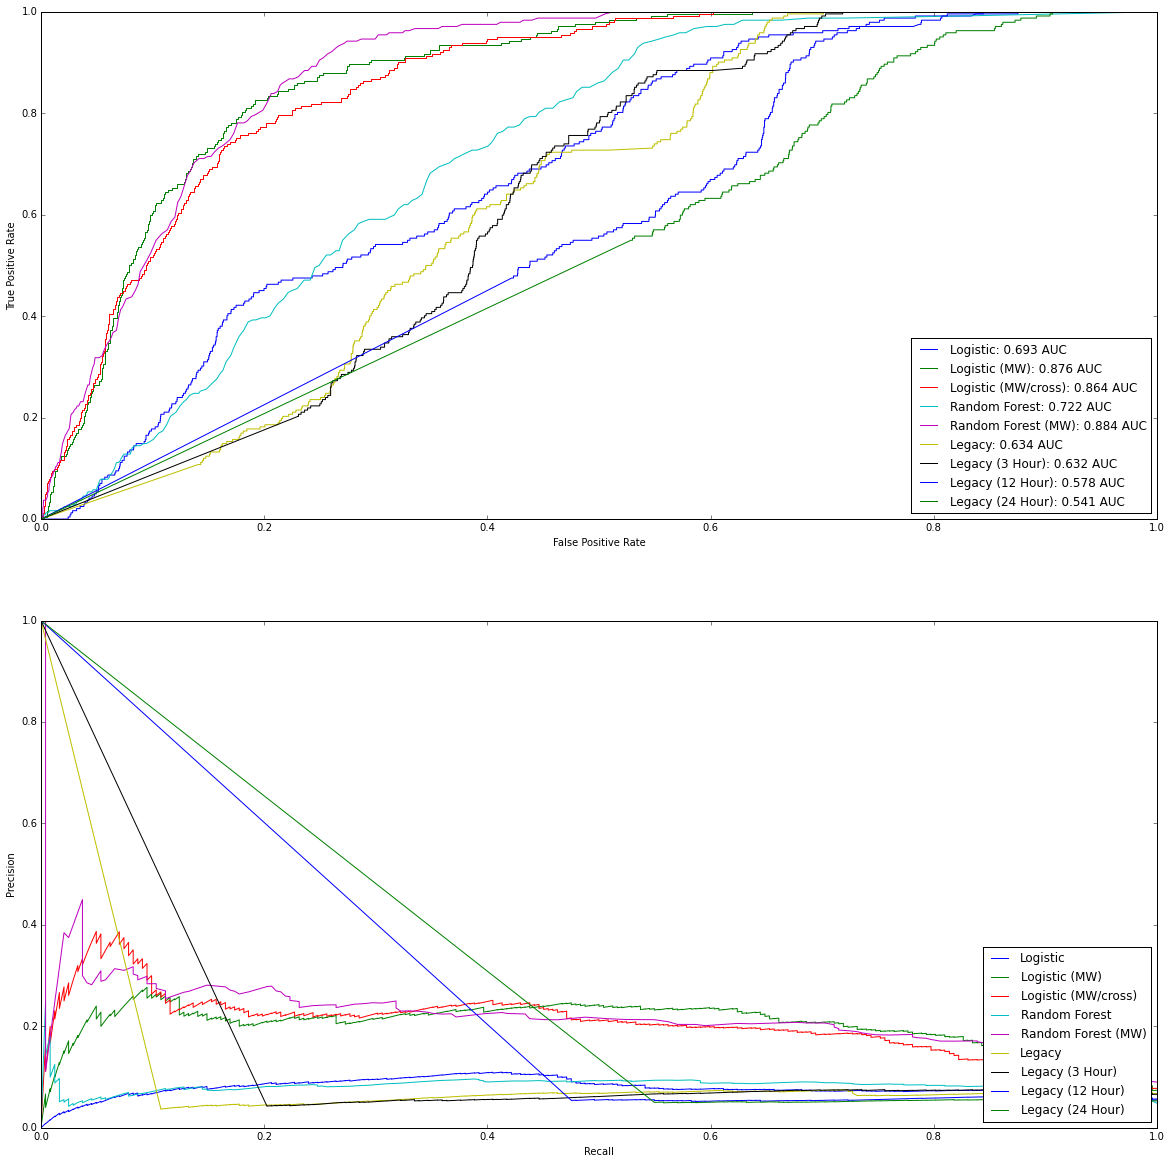

In [3]:
for vessel_class in ["longliner", "trawl", "ps"]:
    display(HTML("<h1>Comparison for {0}</h1>".format(vessel_class)))
    x, xtrain, xcross, xtest = vessel_scoring.data.load_dataset_by_vessel(
            'datasets/kristina_{0}.measures.npz'.format(vessel_class))
    trained_models = [(name, train_model_on_data(mdl, xtrain)) for (name, mdl) in untrained_models]
    for name, mdl in trained_models:
        evaluate_model(mdl, xtest, name=name)
    print
    print
    display(HTML("<h1>AUC comparison for {0}</h1>".format(vessel_class)))
    compare_models(trained_models, xtest)